In [1]:
"""This ipynb contains code for all models , i have evaluated performance on 6 models with global average pool ,
batch normalisation , dropout values , changing batch size and number of dense layers and number of neurons in dense layers."""

'This ipynb contains code for all models , i have evaluated performance on 6 models with global average pool ,\nbatch normalisation , dropout values , changing batch size and number of dense layers and number of neurons in dense layers.'

Mounted at /content/drive


Saving COVID_CT_dataset.zip to COVID_CT_dataset.zip
Found 596 validated image filenames belonging to 2 classes.
Found 150 validated image filenames belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 24s 612ms/step - accuracy: 0.5797 - loss: 0.7006
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.7606 - loss: 0.4662
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - accuracy: 0.8037 - loss: 0.4123
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.8872 - loss: 0.3172
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.9119 - loss: 0.2434
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 154ms/step - accuracy: 0.9179 - loss: 0.2325
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - accuracy: 0.9438 - loss: 0.1801
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.9497 - loss: 0.1721
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.9631 - loss: 0.1260
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.9721 - loss: 0.1130
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step

Classification Report:

              precision    recall  f1-score   support

    CT_COVID     

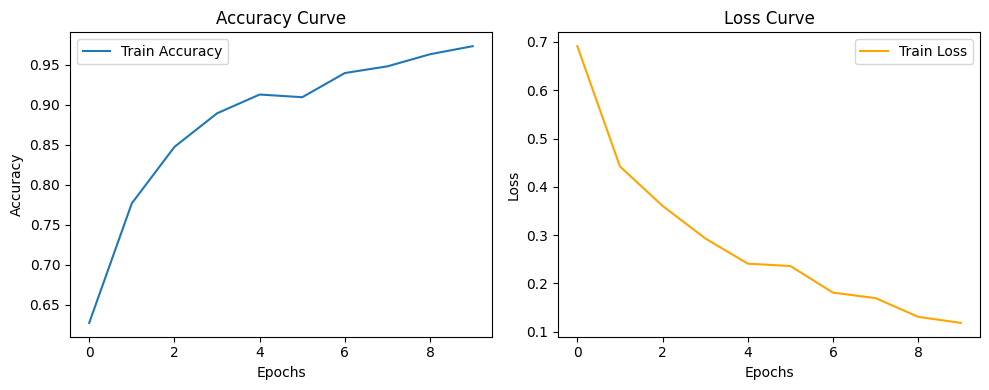


 All results saved to: /content/drive/MyDrive/nnexp7_files


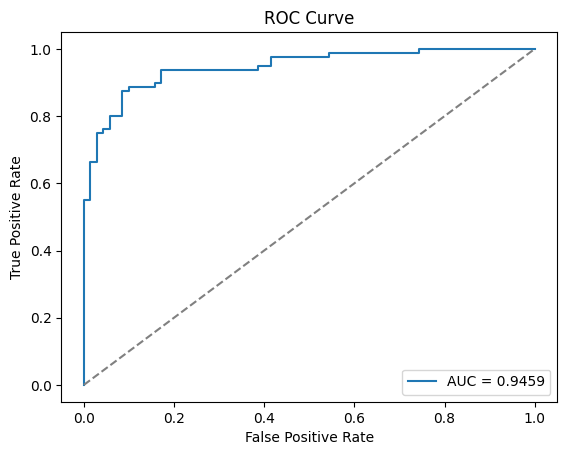

In [1]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# 2. Upload ZIP from Local System
from google.colab import files
import zipfile, os

uploaded = files.upload()  # Upload COVID_CT_dataset.zip

for fn in uploaded.keys():
    zip_path = fn
    extract_dir = '/content/covid_data'
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

# 3. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, roc_curve
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# 4. Dataset Setup
data_dir = os.path.join(extract_dir, 'COVID_CT_dataset')
categories = ['CT_COVID', 'CT_NonCOVID']

filepaths, labels = [], []

for category in categories:
    folder = os.path.join(data_dir, category)
    for fname in os.listdir(folder):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            filepaths.append(os.path.join(folder, fname))
            labels.append(category)

df = pd.DataFrame({'filename': filepaths, 'label': labels})

"""1 model
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)"""

Found 596 validated image filenames belonging to 2 classes.
Found 150 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 266ms/step - accuracy: 0.5117 - loss: 0.8466
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step - accuracy: 0.7115 - loss: 0.6232
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.7585 - loss: 0.5126
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.8041 - loss: 0.4521
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.8092 - loss: 0.4273
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.8422 - loss: 0.3757
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.8514 - loss: 0.3488
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 180ms/step - accuracy: 0.8883 - loss: 0.2974
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.8840 - loss: 0.2749
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.9066 - loss: 0.2501
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step



Classification Report:

              precision    recall  f1-score   support

    CT_COVID       0.91      0.60      0.72        70
 CT_NonCOVID       0.73      0.95      0.83        80

    accuracy                           0.79       150
   macro avg       0.82      0.77      0.78       150
weighted avg       0.82      0.79      0.78       150

F1 Score: 0.8261
Accuracy: 0.7867
AUC: 0.9377


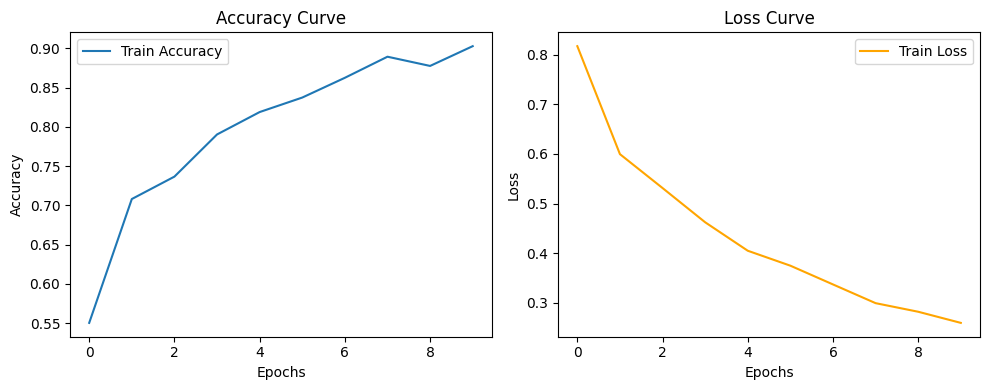


 All results saved to: /content/drive/MyDrive/nnexp7_files


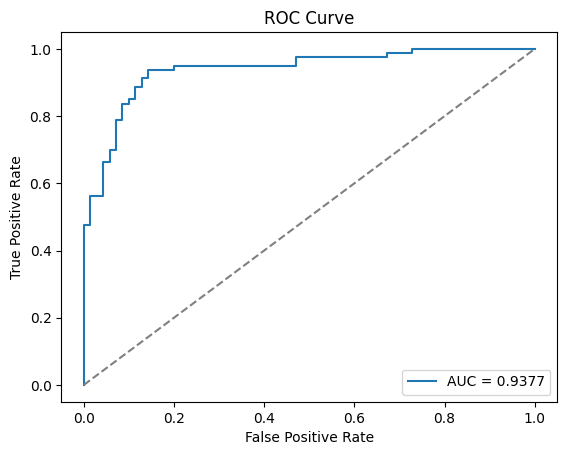

In [2]:
"""2 model"""
# 3. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, roc_curve
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# 5. Train-Test Split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# 6. Data Generators
img_size = 224
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_dataframe(
    train_df, x_col='filename', y_col='label',
    target_size=(img_size, img_size), batch_size=batch_size,
    class_mode='binary'
)

test_gen = datagen.flow_from_dataframe(
    test_df, x_col='filename', y_col='label',
    target_size=(img_size, img_size), batch_size=1,
    class_mode='binary', shuffle=False
)

# 7. Build Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# 8. Train Model
history = model.fit(train_gen, epochs=10)

# 9. Evaluate Model
pred_probs = model.predict(test_gen)
preds = (pred_probs > 0.5).astype(int).reshape(-1)
true = test_gen.classes

f1 = f1_score(true, preds)
acc = accuracy_score(true, preds)
auc = roc_auc_score(true, pred_probs)
report = classification_report(true, preds, target_names=test_gen.class_indices.keys())

print("\nClassification Report:\n")
print(report)
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"AUC: {auc:.4f}")

# 10. Save Results to Google Drive
results_path = '/content/drive/MyDrive/nnexp7_files'
os.makedirs(results_path, exist_ok=True)

# (a) Save metrics
with open(f'{results_path}/metrics_report2.txt', 'w') as f:
    f.write("Classification Report:\n")
    f.write(report + '\n')
    f.write(f"F1 Score: {f1:.4f}\n")
    f.write(f"Accuracy: {acc:.4f}\n")
    f.write(f"AUC: {auc:.4f}\n")

# (b) Save model
model.save(f'{results_path}/vgg16_covid_classifier2.h5')

# (c) Plot accuracy/loss curves
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', color='orange')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig(f'{results_path}/training_curves2.png')
plt.show()

# (d) Plot AUC curve
fpr, tpr, _ = roc_curve(true, pred_probs)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig(f'{results_path}/auc_curve2.png')

print(f"\n All results saved to: {results_path}")

Found 596 validated image filenames belonging to 2 classes.
Found 150 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - accuracy: 0.5004 - loss: 0.7921
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 170ms/step - accuracy: 0.5231 - loss: 0.7588
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - accuracy: 0.5166 - loss: 0.7191
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.5603 - loss: 0.6949
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.5685 - loss: 0.6898
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.5480 - loss: 0.6842
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.5654 - loss: 0.6829
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.6045 - loss: 0.6481
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.5923 - loss: 0.6607
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.5766 - loss: 0.6684
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step



Classification Report:

              precision    recall  f1-score   support

    CT_COVID       0.72      0.54      0.62        70
 CT_NonCOVID       0.67      0.81      0.73        80

    accuracy                           0.69       150
   macro avg       0.69      0.68      0.68       150
weighted avg       0.69      0.69      0.68       150

F1 Score: 0.7345
Accuracy: 0.6867
AUC: 0.8005


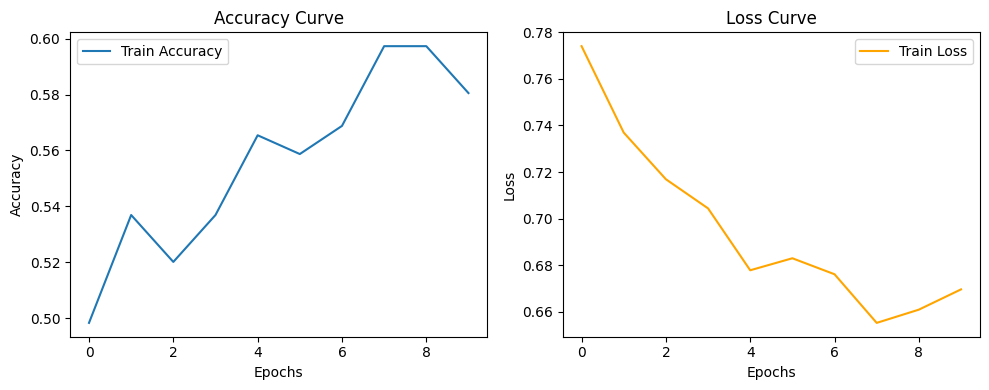


 All results saved to: /content/drive/MyDrive/nnexp7_files


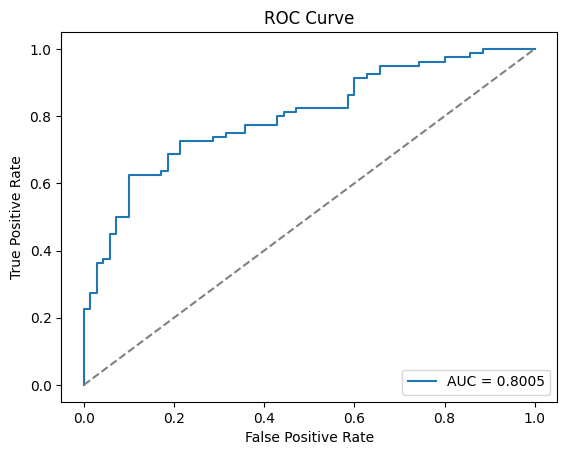

In [4]:
""" 3 model """
from tensorflow.keras.layers import GlobalAveragePooling2D
# 5. Train-Test Split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# 6. Data Generators
img_size = 224
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_dataframe(
    train_df, x_col='filename', y_col='label',
    target_size=(img_size, img_size), batch_size=batch_size,
    class_mode='binary'
)

test_gen = datagen.flow_from_dataframe(
    test_df, x_col='filename', y_col='label',
    target_size=(img_size, img_size), batch_size=1,
    class_mode='binary', shuffle=False
)

# 7. Build Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# 8. Train Model
history = model.fit(train_gen, epochs=10)

# 9. Evaluate Model
pred_probs = model.predict(test_gen)
preds = (pred_probs > 0.5).astype(int).reshape(-1)
true = test_gen.classes

f1 = f1_score(true, preds)
acc = accuracy_score(true, preds)
auc = roc_auc_score(true, pred_probs)
report = classification_report(true, preds, target_names=test_gen.class_indices.keys())

print("\nClassification Report:\n")
print(report)
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"AUC: {auc:.4f}")

# 10. Save Results to Google Drive
results_path = '/content/drive/MyDrive/nnexp7_files'
os.makedirs(results_path, exist_ok=True)

# (a) Save metrics
with open(f'{results_path}/metrics_report2.txt', 'w') as f:
    f.write("Classification Report:\n")
    f.write(report + '\n')
    f.write(f"F1 Score: {f1:.4f}\n")
    f.write(f"Accuracy: {acc:.4f}\n")
    f.write(f"AUC: {auc:.4f}\n")

# (b) Save model
model.save(f'{results_path}/vgg16_covid_classifier3.h5')

# (c) Plot accuracy/loss curves
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', color='orange')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig(f'{results_path}/training_curves3.png')
plt.show()

# (d) Plot AUC curve
fpr, tpr, _ = roc_curve(true, pred_probs)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig(f'{results_path}/auc_curve3.png')

print(f"\n All results saved to: {results_path}")

Found 596 validated image filenames belonging to 2 classes.
Found 150 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 327ms/step - accuracy: 0.5150 - loss: 0.7358
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.5422 - loss: 0.7148
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.5815 - loss: 0.6714
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - accuracy: 0.5567 - loss: 0.6735
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.6015 - loss: 0.6617
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.6130 - loss: 0.6438
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.5660 - loss: 0.6637
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 195ms/step - accuracy: 0.6082 - loss: 0.6665
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.6575 - loss: 0.6166
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - accuracy: 0.6889 - loss: 0.6114
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step



Classification Report:

              precision    recall  f1-score   support

    CT_COVID       0.72      0.59      0.65        70
 CT_NonCOVID       0.69      0.80      0.74        80

    accuracy                           0.70       150
   macro avg       0.70      0.69      0.69       150
weighted avg       0.70      0.70      0.70       150

F1 Score: 0.7399
Accuracy: 0.7000
AUC: 0.8102


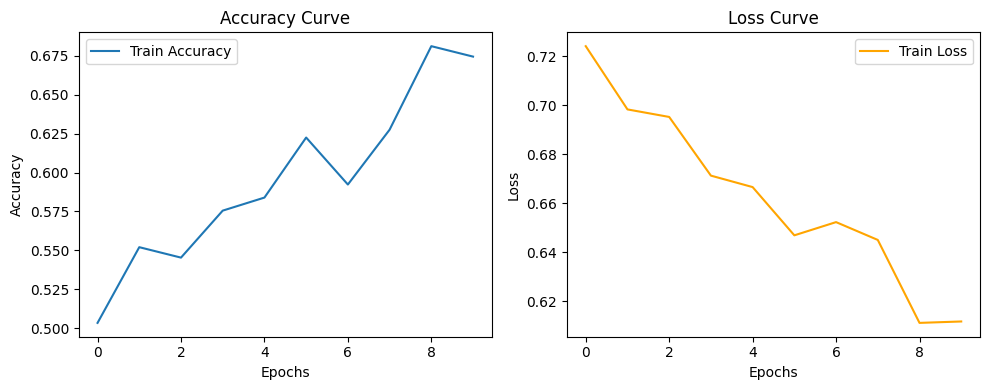


 All results saved to: /content/drive/MyDrive/nnexp7_files


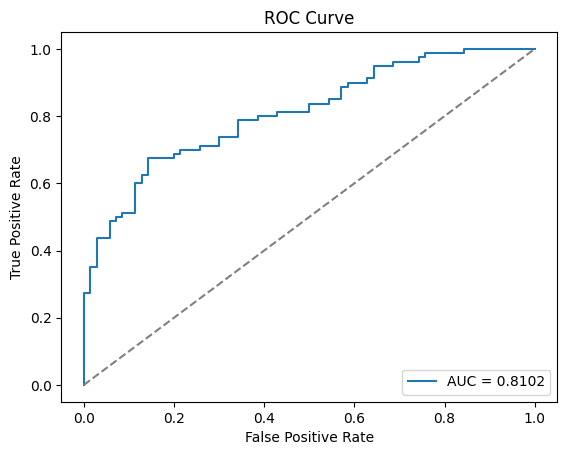

In [5]:
""" 4 model """
from tensorflow.keras.layers import GlobalAveragePooling2D
# 5. Train-Test Split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# 6. Data Generators
img_size = 224
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_dataframe(
    train_df, x_col='filename', y_col='label',
    target_size=(img_size, img_size), batch_size=batch_size,
    class_mode='binary'
)

test_gen = datagen.flow_from_dataframe(
    test_df, x_col='filename', y_col='label',
    target_size=(img_size, img_size), batch_size=1,
    class_mode='binary', shuffle=False
)

# 7. Build Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)


model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# 8. Train Model
history = model.fit(train_gen, epochs=10)

# 9. Evaluate Model
pred_probs = model.predict(test_gen)
preds = (pred_probs > 0.5).astype(int).reshape(-1)
true = test_gen.classes

f1 = f1_score(true, preds)
acc = accuracy_score(true, preds)
auc = roc_auc_score(true, pred_probs)
report = classification_report(true, preds, target_names=test_gen.class_indices.keys())

print("\nClassification Report:\n")
print(report)
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"AUC: {auc:.4f}")

# 10. Save Results to Google Drive
results_path = '/content/drive/MyDrive/nnexp7_files'
os.makedirs(results_path, exist_ok=True)

# (a) Save metrics
with open(f'{results_path}/metrics_report2.txt', 'w') as f:
    f.write("Classification Report:\n")
    f.write(report + '\n')
    f.write(f"F1 Score: {f1:.4f}\n")
    f.write(f"Accuracy: {acc:.4f}\n")
    f.write(f"AUC: {auc:.4f}\n")

# (b) Save model
model.save(f'{results_path}/vgg16_covid_classifier4.h5')

# (c) Plot accuracy/loss curves
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', color='orange')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig(f'{results_path}/training_curves4.png')
plt.show()

# (d) Plot AUC curve
fpr, tpr, _ = roc_curve(true, pred_probs)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig(f'{results_path}/auc_curve4.png')

print(f"\n All results saved to: {results_path}")

Found 596 validated image filenames belonging to 2 classes.
Found 150 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 301ms/step - accuracy: 0.5399 - loss: 0.8328
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.6071 - loss: 0.7289
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.6330 - loss: 0.6467
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.6774 - loss: 0.5947
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 0.7057 - loss: 0.5832
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.7596 - loss: 0.4948
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.7635 - loss: 0.5118
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.7440 - loss: 0.4973
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.8066 - loss: 0.4194
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.8046 - loss: 0.4077
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step



Classification Report:

              precision    recall  f1-score   support

    CT_COVID       0.79      0.63      0.70        70
 CT_NonCOVID       0.72      0.85      0.78        80

    accuracy                           0.75       150
   macro avg       0.75      0.74      0.74       150
weighted avg       0.75      0.75      0.74       150

F1 Score: 0.7816
Accuracy: 0.7467
AUC: 0.8557


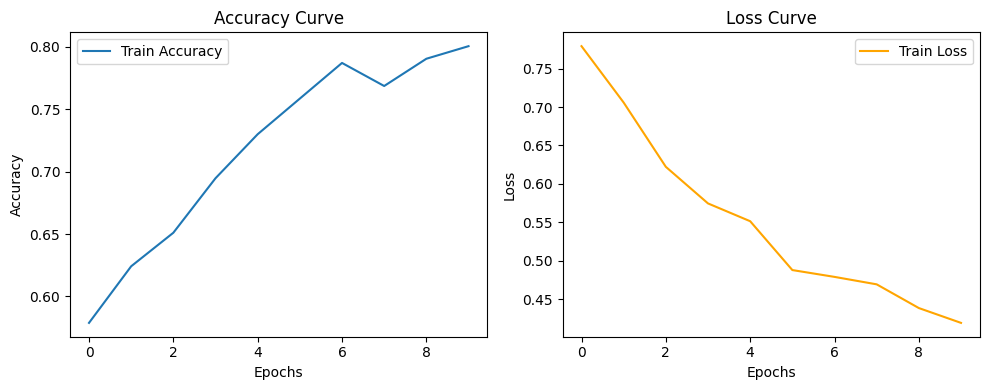


 All results saved to: /content/drive/MyDrive/nnexp7_files


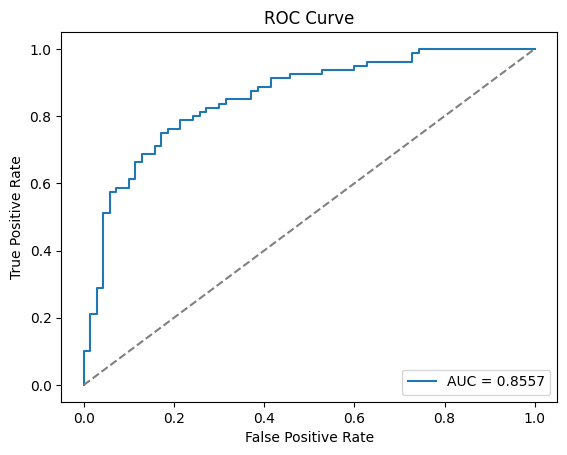

In [7]:
""" 5 model """
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

# 5. Train-Test Split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# 6. Data Generators
img_size = 224
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_dataframe(
    train_df, x_col='filename', y_col='label',
    target_size=(img_size, img_size), batch_size=batch_size,
    class_mode='binary'
)

test_gen = datagen.flow_from_dataframe(
    test_df, x_col='filename', y_col='label',
    target_size=(img_size, img_size), batch_size=1,
    class_mode='binary', shuffle=False
)

# 7. Build Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
output = Dense(1, activation='sigmoid')(x)


model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# 8. Train Model
history = model.fit(train_gen, epochs=10)

# 9. Evaluate Model
pred_probs = model.predict(test_gen)
preds = (pred_probs > 0.5).astype(int).reshape(-1)
true = test_gen.classes

f1 = f1_score(true, preds)
acc = accuracy_score(true, preds)
auc = roc_auc_score(true, pred_probs)
report = classification_report(true, preds, target_names=test_gen.class_indices.keys())

print("\nClassification Report:\n")
print(report)
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"AUC: {auc:.4f}")

# 10. Save Results to Google Drive
results_path = '/content/drive/MyDrive/nnexp7_files'
os.makedirs(results_path, exist_ok=True)

# (a) Save metrics
with open(f'{results_path}/metrics_report2.txt', 'w') as f:
    f.write("Classification Report:\n")
    f.write(report + '\n')
    f.write(f"F1 Score: {f1:.4f}\n")
    f.write(f"Accuracy: {acc:.4f}\n")
    f.write(f"AUC: {auc:.4f}\n")

# (b) Save model
model.save(f'{results_path}/vgg16_covid_classifier5.h5')

# (c) Plot accuracy/loss curves
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', color='orange')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig(f'{results_path}/training_curves5.png')
plt.show()

# (d) Plot AUC curve
fpr, tpr, _ = roc_curve(true, pred_probs)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig(f'{results_path}/auc_curve5.png')

print(f"\n All results saved to: {results_path}")

Found 596 validated image filenames belonging to 2 classes.
Found 150 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 520ms/step - accuracy: 0.4742 - loss: 0.9074
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step - accuracy: 0.5714 - loss: 0.7486
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 293ms/step - accuracy: 0.6609 - loss: 0.6668
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 351ms/step - accuracy: 0.6948 - loss: 0.6210
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 297ms/step - accuracy: 0.7434 - loss: 0.5323
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/step - accuracy: 0.7285 - loss: 0.5478
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 312ms/step - accuracy: 0.7534 - loss: 0.5104
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 308ms/step - accuracy: 0.7604 - loss: 0.5021
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 301ms/step - accuracy: 0.7500 - loss: 0.5017
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 300ms/step - accuracy: 0.7590 - loss: 0.4924
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step



Classification Report:

              precision    recall  f1-score   support

    CT_COVID       0.78      0.54      0.64        70
 CT_NonCOVID       0.68      0.86      0.76        80

    accuracy                           0.71       150
   macro avg       0.73      0.70      0.70       150
weighted avg       0.73      0.71      0.70       150

F1 Score: 0.7624
Accuracy: 0.7133
AUC: 0.8329


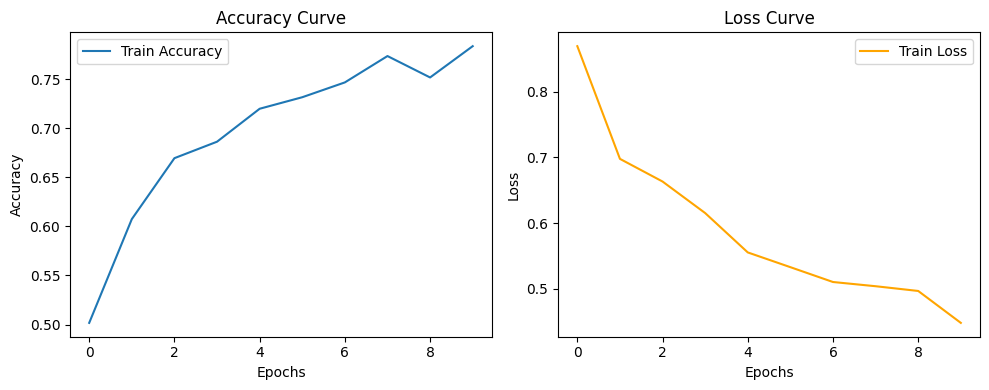


 All results saved to: /content/drive/MyDrive/nnexp7_files


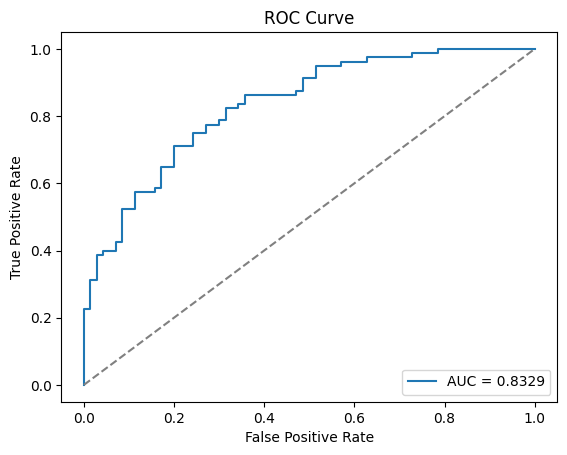

In [8]:
""" 6 model """
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

# 5. Train-Test Split
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

# 6. Data Generators
img_size = 224
batch_size = 64

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_dataframe(
    train_df, x_col='filename', y_col='label',
    target_size=(img_size, img_size), batch_size=batch_size,
    class_mode='binary'
)

test_gen = datagen.flow_from_dataframe(
    test_df, x_col='filename', y_col='label',
    target_size=(img_size, img_size), batch_size=1,
    class_mode='binary', shuffle=False
)

# 7. Build Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
output = Dense(1, activation='sigmoid')(x)


model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# 8. Train Model
history = model.fit(train_gen, epochs=10)

# 9. Evaluate Model
pred_probs = model.predict(test_gen)
preds = (pred_probs > 0.5).astype(int).reshape(-1)
true = test_gen.classes

f1 = f1_score(true, preds)
acc = accuracy_score(true, preds)
auc = roc_auc_score(true, pred_probs)
report = classification_report(true, preds, target_names=test_gen.class_indices.keys())

print("\nClassification Report:\n")
print(report)
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {acc:.4f}")
print(f"AUC: {auc:.4f}")

# 10. Save Results to Google Drive
results_path = '/content/drive/MyDrive/nnexp7_files'
os.makedirs(results_path, exist_ok=True)

# (a) Save metrics
with open(f'{results_path}/metrics_report6.txt', 'w') as f:
    f.write("Classification Report:\n")
    f.write(report + '\n')
    f.write(f"F1 Score: {f1:.4f}\n")
    f.write(f"Accuracy: {acc:.4f}\n")
    f.write(f"AUC: {auc:.4f}\n")

# (b) Save model
model.save(f'{results_path}/vgg16_covid_classifier6.h5')

# (c) Plot accuracy/loss curves
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', color='orange')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig(f'{results_path}/training_curves6.png')
plt.show()

# (d) Plot AUC curve
fpr, tpr, _ = roc_curve(true, pred_probs)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.savefig(f'{results_path}/auc_curve6.png')

print(f"\n All results saved to: {results_path}")